In [6]:
# %matplotlib inline
import IPython
from os import path
from pydub import AudioSegment
import random
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore")
from os import walk
from IPython import display

In [2]:
# alslam_alikom_files = 'Alslam Alikom'
# sabah_alkair_files = 'Sabah Alkhair'

In [3]:
# del alslam_alikom_files
# del sabah_alkair_files

In [4]:
path_Alikoms = 'sust/direction'
path_Sabah = 'sust/glasses'
alslam_alikoms = next(walk(path_Alikoms), (None, None, []))[2]  # [] if no file
sabah_alkhairs = next(walk(path_Sabah), (None, None, []))[2]  # [] if no file
sabah_anour = next(walk('Sabah Alnour/'), (None, None, []))[2]

In [5]:
sabah_anour

['AUD-20221105-WA0155.wav',
 'AUD-20221105-WA0098.wav',
 'AUD-20221105-WA01.wav',
 'AUD-20221105-WA0103.wav',
 'AUD-20221105-WA0192.wav',
 'AUD-20221105-WA0172.wav',
 'AUD-20221105-WA0170.wav',
 'AUD-20221105-WA0058.wav',
 'AUD-20221105-WA004.wav',
 'AUD-20221105-WA0171.wav',
 'AUD-20221105-WA0020.wav']

In [6]:
len(alslam_alikoms), len(sabah_alkhairs)

(11, 11)

In [7]:
random_sabah = random.choice(sabah_alkhairs)
random_aalikom = random.choice(alslam_alikoms)

In [8]:
random_sabah , random_aalikom

('AUD-20221105-WA0192.wav', 'AUD-20221105-WA004.wav')

In [9]:
sample,sample_rate = librosa.load(path_Alikoms+'/'+random_aalikom)
sample2, sample_rate2 = librosa.load(path_Sabah+'/'+random_sabah)

In [10]:
def random_sample():
    random_sabah = random.choice(sabah_alkhairs)
    random_aalikom = random.choice(alslam_alikoms)
    global sample,sample2,sample_rate,sample_rate2
    sample,sample_rate = librosa.load(path_Alikoms+'/'+random_aalikom)
    sample2, sample_rate2 = librosa.load(path_Sabah+'/'+random_sabah)

In [11]:
random_sample()

In [12]:
random_sample()
sample.shape, sample_rate , sample2.shape, sample_rate2


((92669,), 22050, (48904,), 22050)

In [15]:
def Aina():
    random_sabah = random.choice(sabah_alkhairs)
    random_aalikom = random.choice(alslam_alikoms)

    sample,sample_rate = librosa.load(path_Alikoms+'/'+random_aalikom)
    sample2, sample_rate2 = librosa.load(path_Sabah+'/'+random_sabah)

    fig , axes = plt.subplots(ncols=2,figsize=(15,3))
    librosa.display.waveshow(sample,sr=sample_rate,ax=axes[0],color='y')
    librosa.display.waveshow(sample2,sr=sample_rate2,ax=axes[1])
    axes[0].set(title='Alsalam Alikom');
    axes[1].set(title='Sabah AlKhair');
    #Sampling Rate
    # ipd.Audio(sample, rate=sample_rate)
    # ipd.Audio(sample2, rate=sample_rate2)

    print('Alsalam Alikom')
    IPython.display.display(IPython.display.Audio(sample, rate=sample_rate))
    print('Sabah AlKhair')
    IPython.display.display(IPython.display.Audio(sample2, rate=sample_rate2))
    # ipd.Audio(sample2, rate=sample_rate2)

In [16]:
sample_rate

22050

In [17]:
def play(sample):
    IPython.display.display(IPython.display.Audio(sample, rate=sample_rate))

Alsalam Alikom


Sabah AlKhair


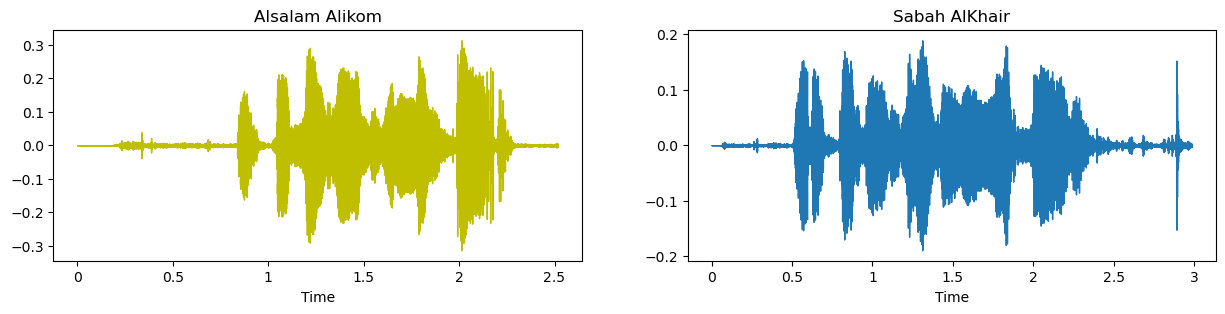

In [18]:
Aina()

In [19]:
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#Spectogram
# def
def spec(sample, sample_rate):
    X = librosa.stft(sample)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

In [20]:
def spec_pow(sample):
    plt.figure(figsize=(14, 5))
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(sample) 
    plt.show()

In [21]:
random_sample()

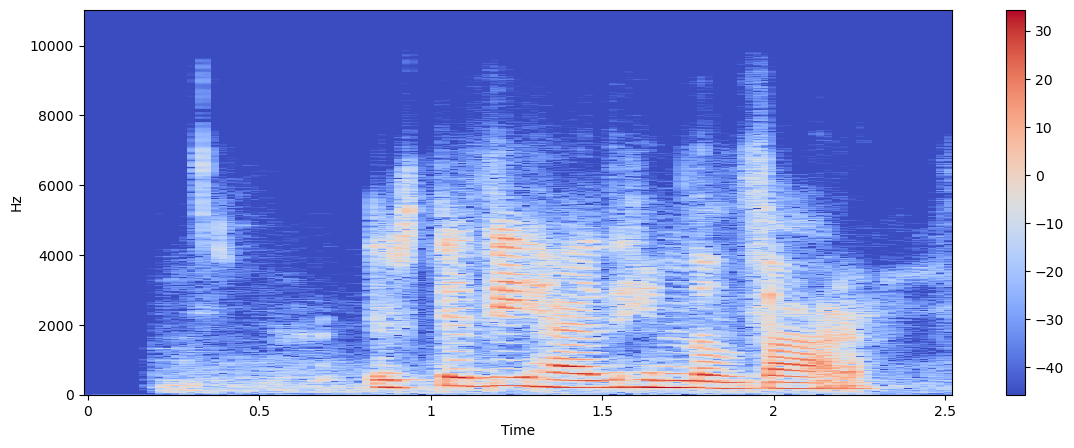

In [22]:
random_sample()
spec(sample2,sample_rate2)

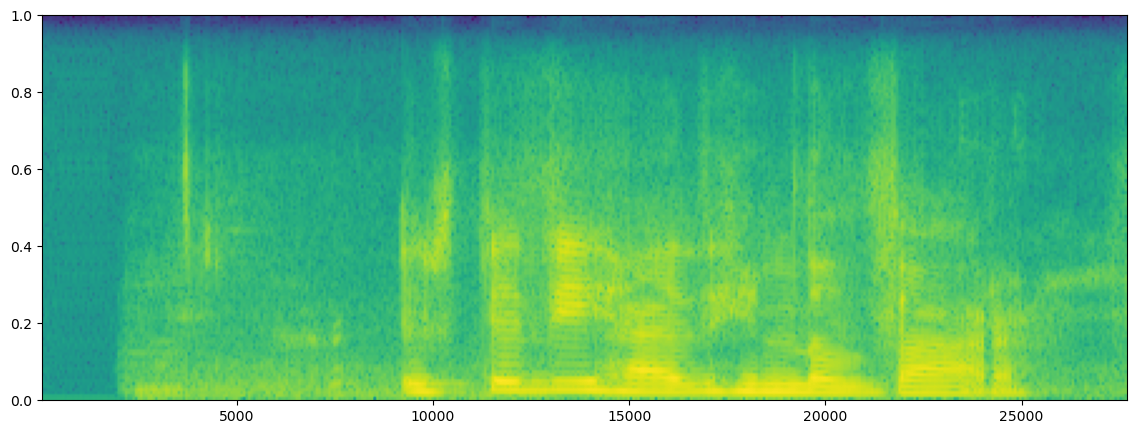

In [23]:
spec_pow(sample2)

In [24]:
play(sample2)

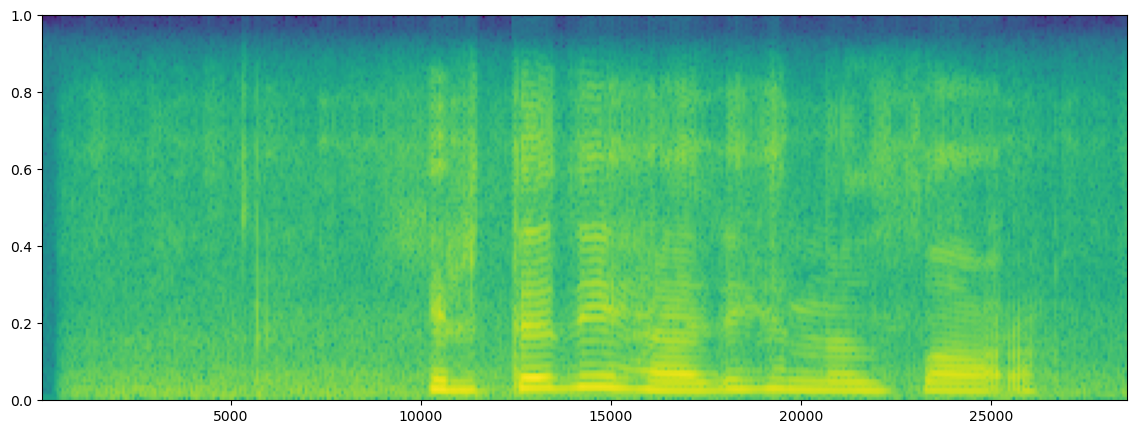

In [25]:
random_sample()
spec_pow(sample)

In [31]:
play(sample)

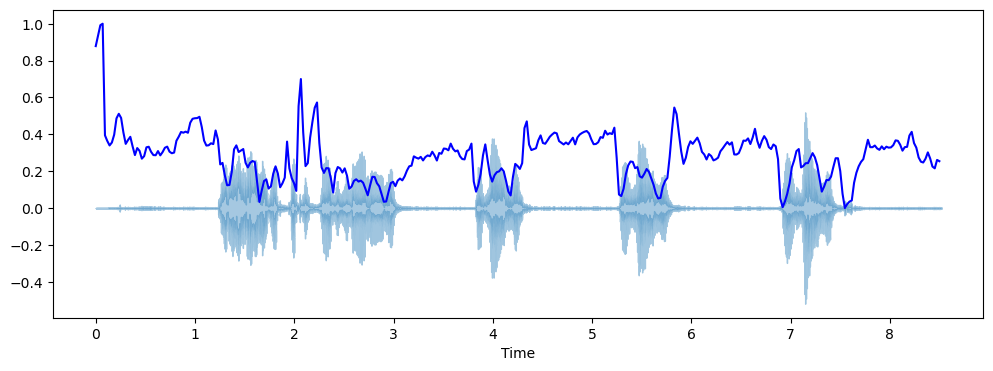

In [32]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(sample, sr=sample_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(sample, axis=0):
    return sklearn.preprocessing.minmax_scale(sample, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(sample, sr=sample_rate, alpha=.4)
plt.plot(t, normalize(spectral_centroids), color='b')

(20, 367)


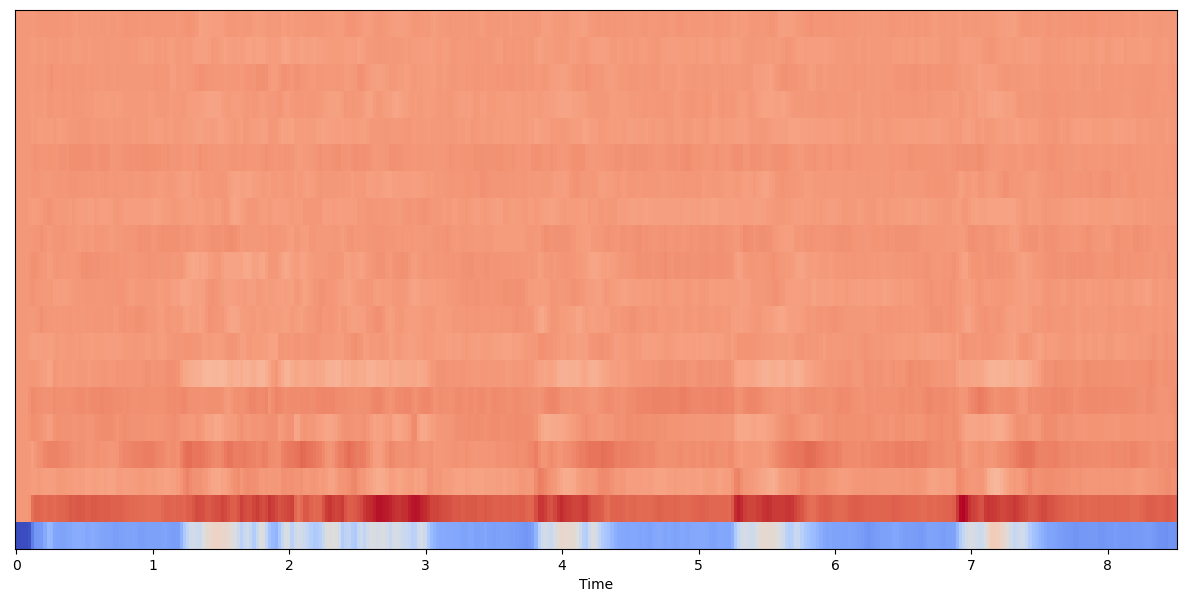

In [33]:
mfccs = librosa.feature.mfcc(sample,sr =sample_rate)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate ,x_axis='time')

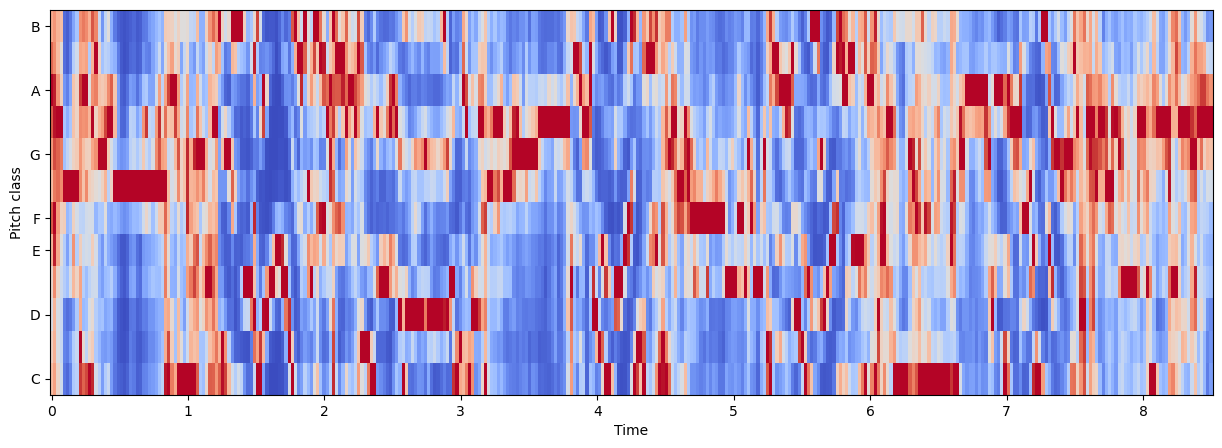

In [34]:
chromagram = librosa.feature.chroma_stft(sample)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma' ,cmap='coolwarm')

In [35]:
random_sample()

ValueError: x and y must have same first dimension, but have shapes (311,) and (105,)

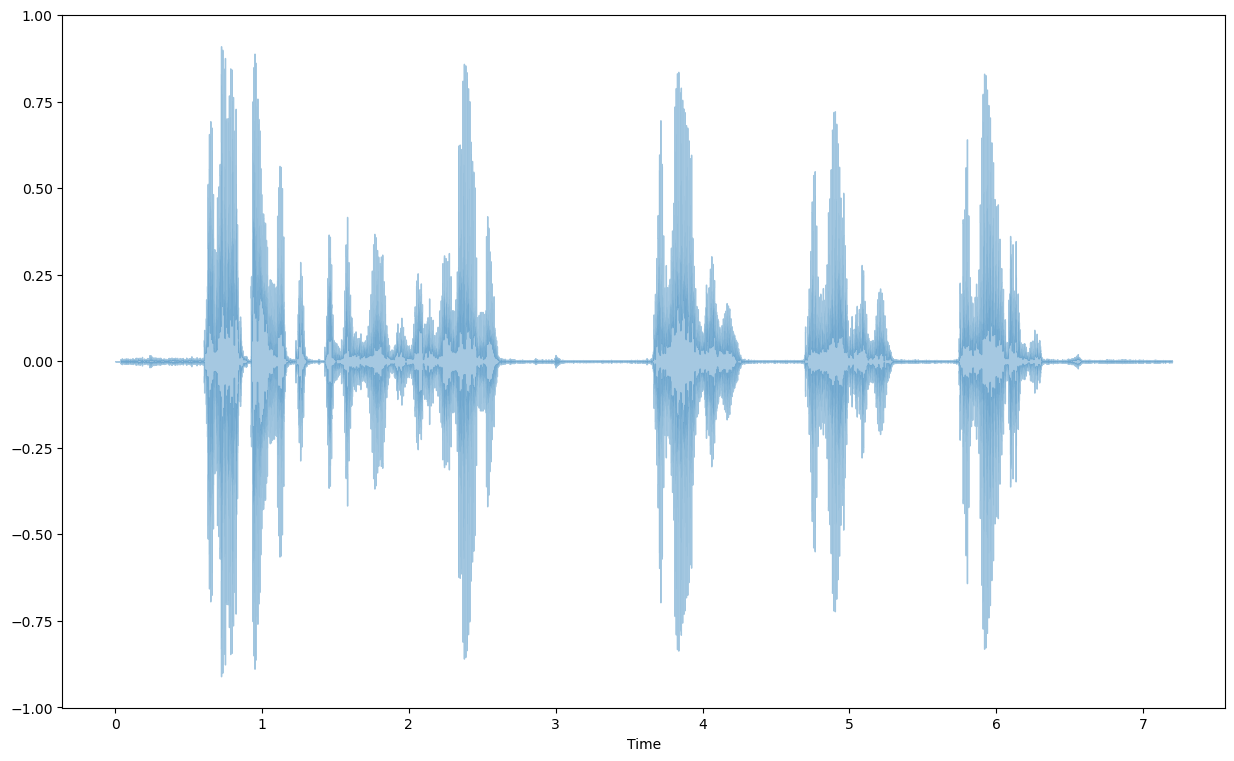

In [41]:
random_sample()
# spectral_bandwidth_2[:100]
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sample+0.01)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sample+0.01, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sample+0.01,  p=4)[0]
plt.figure(figsize=(15, 9))
to = spectral_bandwidth_2.shape[0]
librosa.display.waveshow(sample, alpha=0.4)
plt.plot(t[:to], normalize(spectral_bandwidth_2)[:105], color='r')
plt.plot(t[:to], normalize(spectral_bandwidth_3)[:105], color='g')
plt.plot(t[:to], normalize(spectral_bandwidth_4)
         [:105], color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

Alsalam Alikom


Sabah AlKhair


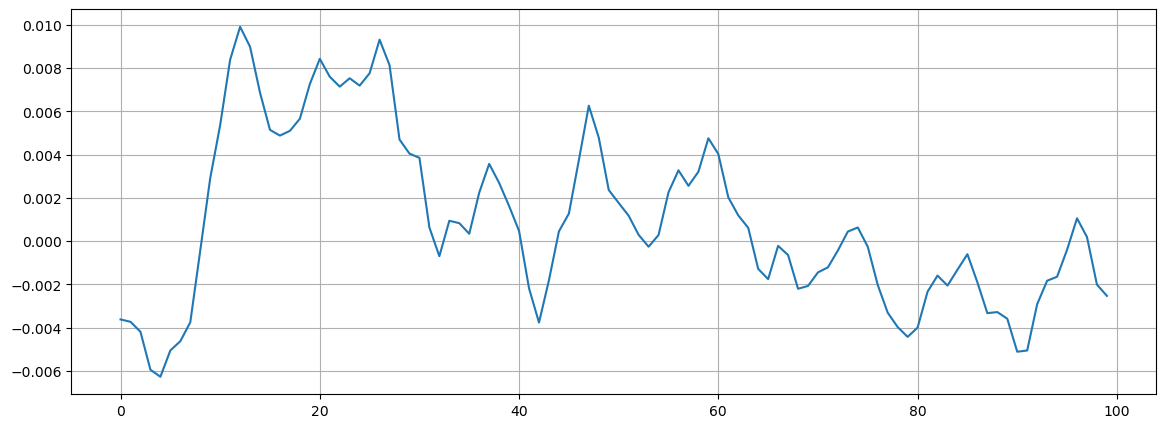

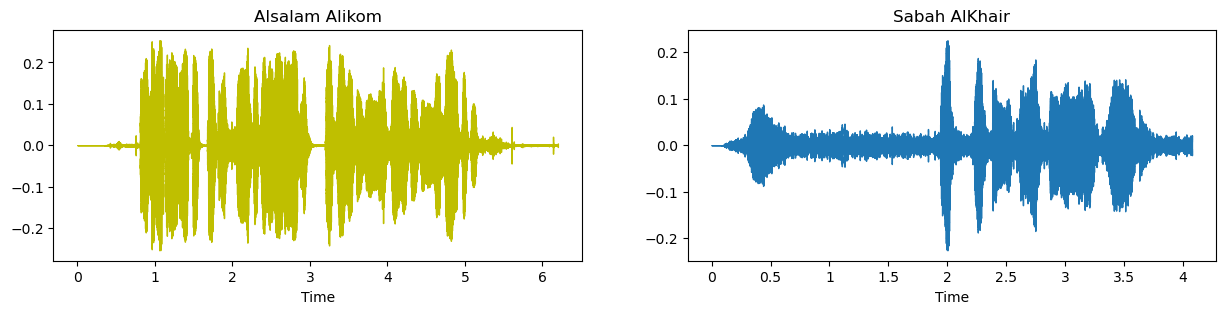

In [42]:
t[:100].shape, spectral_bandwidth_2.shape
i = spectral_bandwidth_2.shape[0]
type(i)

to

spectral_bandwidth_2[:100], spectral_bandwidth_2

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(sample[n0:n1])
plt.grid()

play(sample)

Aina()

* make all of sound about 2 sec
* make all amplitude  0.2
* make a date set x and y label
* model the data

* ram usage

In [43]:
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

# Set the seed value forapt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2 experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)



2022-11-10 23:15:19.290368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 23:15:19.686896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 23:15:19.686926: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 23:15:21.771184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [44]:
tf.__version__

'2.11.0-rc2'

In [45]:
# pip install -U --pre tensorflow tensorflow_datasets

# /usr/local/lib/python3.7/dist-packages

In [46]:
from keras import Sequential
from tensorflow import keras

In [47]:
import os
import pathlib
# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [48]:
DATASET_PATH = 'All/'

data_dir = pathlib.Path(DATASET_PATH)

In [49]:
data_dir

PosixPath('All')

In [50]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['Alslam Alikom' 'Sabah Alkhair']


In [51]:
data_dir

PosixPath('All')

In [52]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=32,
    validation_split=0.4,
    seed=42,
    output_sequence_length=48000,
    
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 112 files belonging to 2 classes.
Using 68 files for training.
Using 44 files for validation.


2022-11-10 23:15:45.142648: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 23:15:45.142688: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 23:15:45.142715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ali-Aspire): /proc/driver/nvidia/version does not exist
2022-11-10 23:15:45.143064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



label names: ['Alslam Alikom' 'Sabah Alkhair']


In [53]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

len(val_ds), len(train_ds)

# test_ds = val_ds.shard(num_shards=2, index=0)
# val_ds = val_ds.shard(num_shards=2, index=1)

(2, 3)

In [54]:
len(test_ds), len(train_ds), len(val_ds)

NameError: name 'test_ds' is not defined

In [55]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [56]:
len(test_ds), len(train_ds), len(val_ds)

(1, 3, 1)

In [10]:
# pip install tensorflow-io

# (train_ds), train_ds.class_names

# tf.__version__

# pip install -U --pre tensorflow tensorflow_datasets

# path_Alikoms = 'Mutanoi/'
# alslam_alikoms = next(walk(path_Alikoms), (None, None, []))[2]  # [] if no file

# alslam_alikoms

# conda install -c conda-forge pydub
# import os
def convert_mp3_to_wave(dir_name):
    for i in dir_name:
        input_file = i
    #     i = i.strip('.mp3')
    #     print(i)
        output_file = f"{i.strip('.mp3')}.wav"
    #     print(output_file)
        # convert mp3 file to wav file
        sound = AudioSegment.from_mp3(f'Sabah Alnour/{i}')
        sound.export(f'Sabah Alnour//'+output_file, format="wav")
        os.remove(f'Sabah Alnour//{i}')
sabah_anour = next(walk('Sabah Alnour/'), (None, None, []))[2]
convert_mp3_to_wave(sabah_anour)

In [57]:
for example_audio, example_labels in train_ds.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

(32, 48000)
(32,)


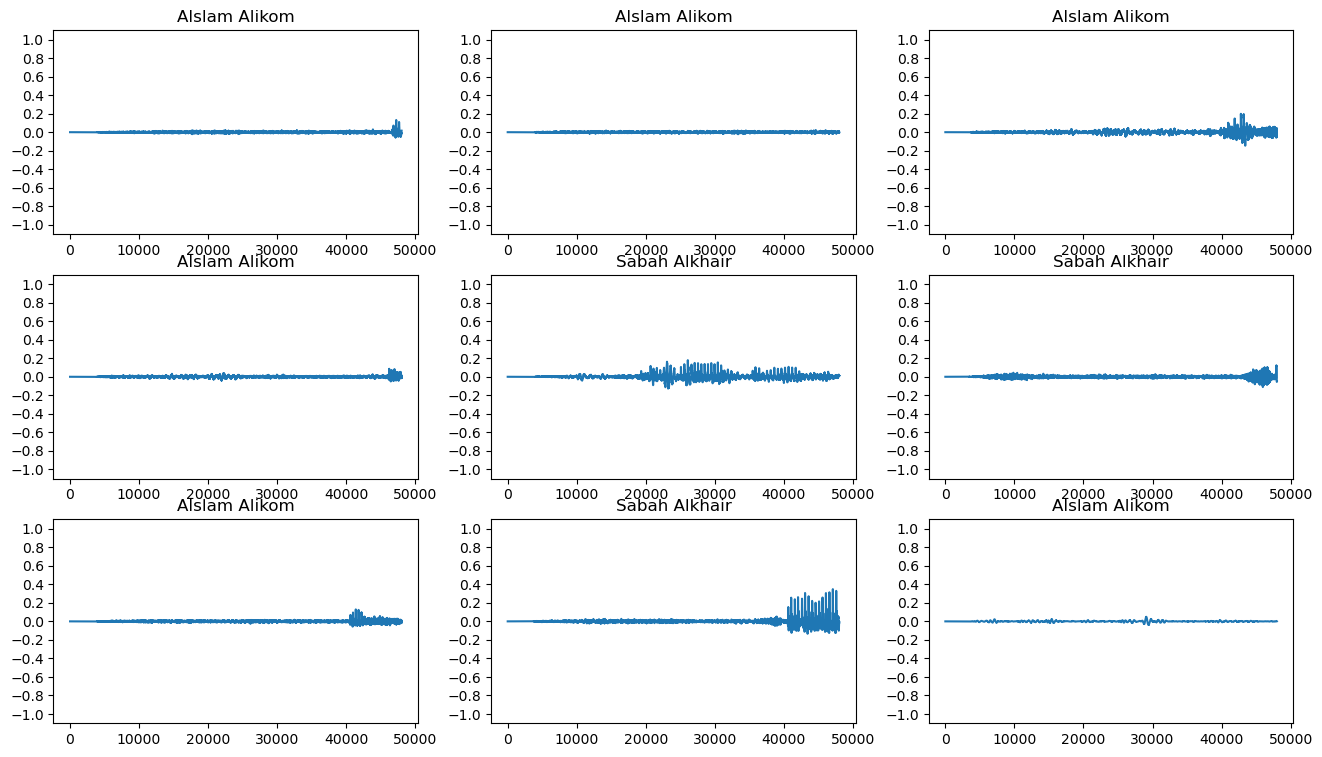

In [498]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
  if i>=n:
    break
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(example_audio[i].numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label_names[example_labels[i]]
  ax.set_title(label)
  ax.set_ylim([-1.1,1.1])

plt.show()

In [499]:
def get_spectrogram(waveform):
    
  # Convert the waveform to a spectrogram via a STFT.
  length = 65536 # 255
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [500]:
# example_audio[1].numpy().shape , sample.shape

In [501]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=48000))

Label: Alslam Alikom
Waveform shape: (48000,)
Spectrogram shape: (374, 129, 1)
Audio playback


Label: Alslam Alikom
Waveform shape: (48000,)
Spectrogram shape: (374, 129, 1)
Audio playback


Label: Alslam Alikom
Waveform shape: (48000,)
Spectrogram shape: (374, 129, 1)
Audio playback


In [502]:
len(example_labels)

32

In [503]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

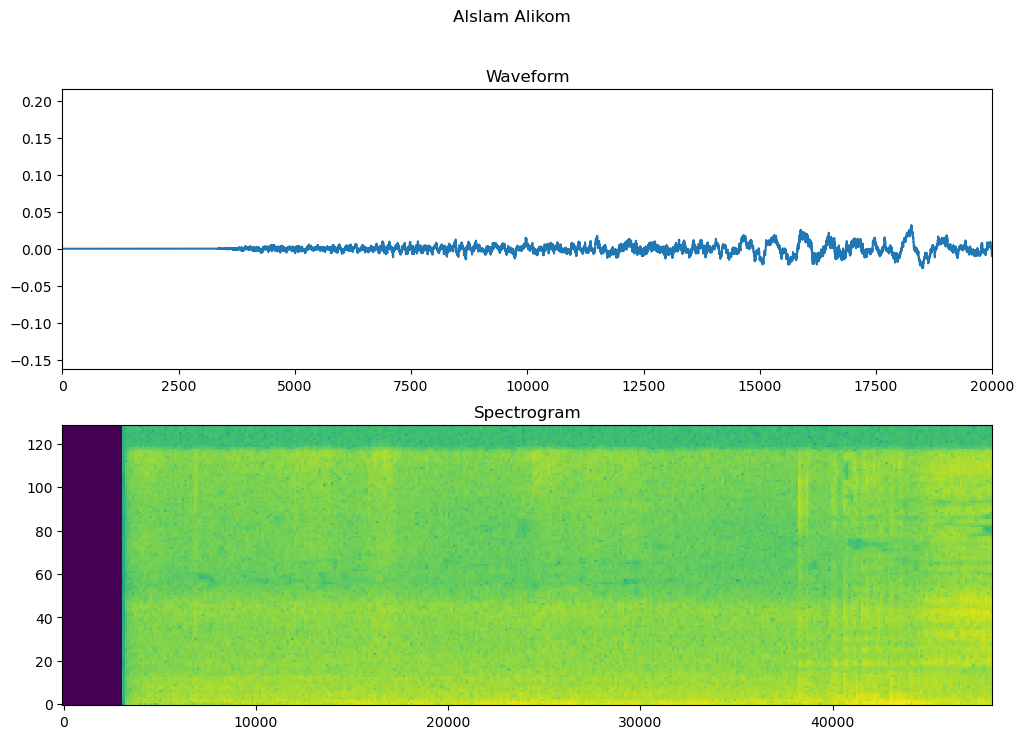

In [504]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 20000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [505]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [506]:
train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

In [507]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

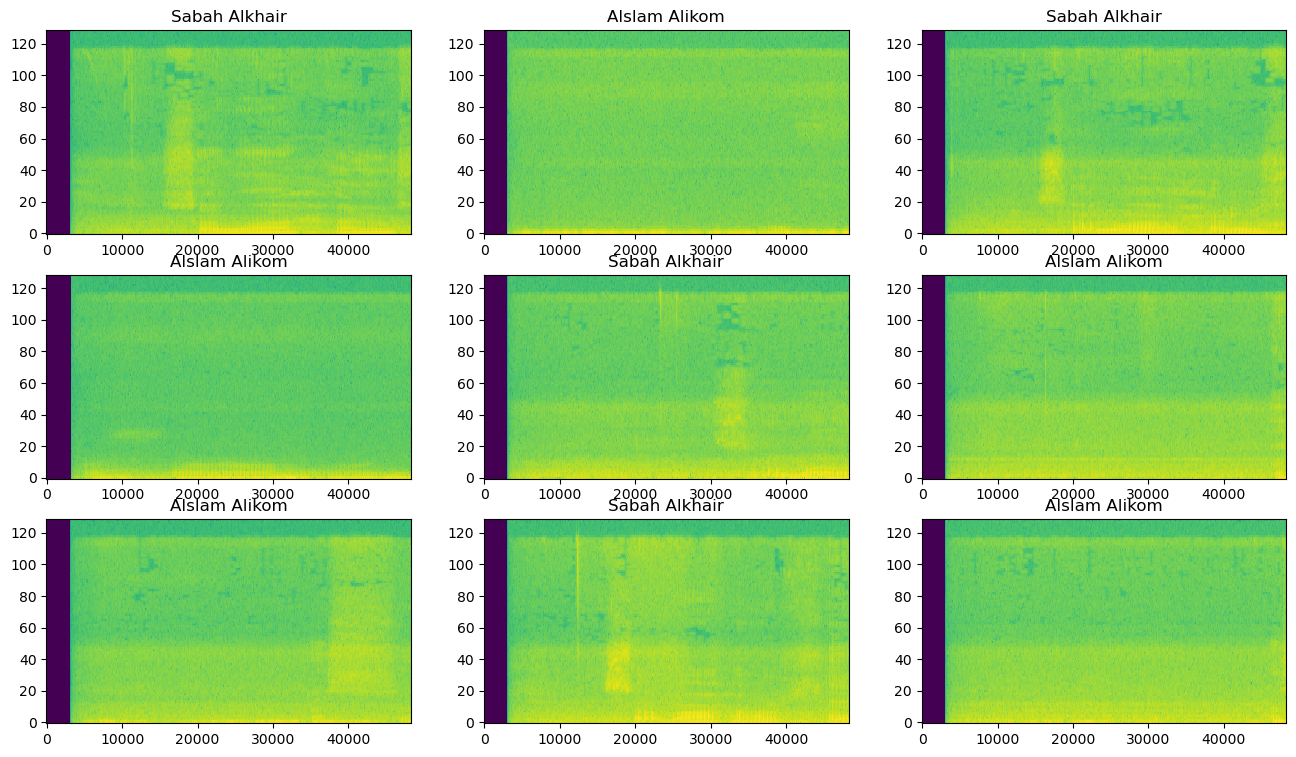

In [508]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(commands[example_spect_labels[i].numpy()])

plt.show()

In [509]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [510]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (374, 129, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_6 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_6 (Normalizat  (None, 32, 32, 1)        3         
 ion)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)      

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

## sharek
- hasfkasd
- afjkas
- jkfkl

***fajfkdlsjf***

<>

In [512]:
len(train_spectrogram_ds)

3

In [513]:
len(val_spectrogram_ds)

1

In [518]:
EPOCHS = 100
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/100
3/3 [==============================] - 0s 104ms/step - loss: 0.3843 - accuracy: 0.7794 - val_loss: 0.7642 - val_accuracy: 0.3077
Epoch 2/100
3/3 [==============================] - 0s 65ms/step - loss: 0.3552 - accuracy: 0.8235 - val_loss: 0.6680 - val_accuracy: 0.6154
Epoch 3/100
3/3 [==============================] - 0s 69ms/step - loss: 0.3326 - accuracy: 0.9118 - val_loss: 0.6985 - val_accuracy: 0.5385
Epoch 4/100
3/3 [==============================] - 0s 89ms/step - loss: 0.2906 - accuracy: 0.8971 - val_loss: 0.8623 - val_accuracy: 0.3846
Epoch 4: early stopping


Text(0, 0.5, 'Accuracy [%]')

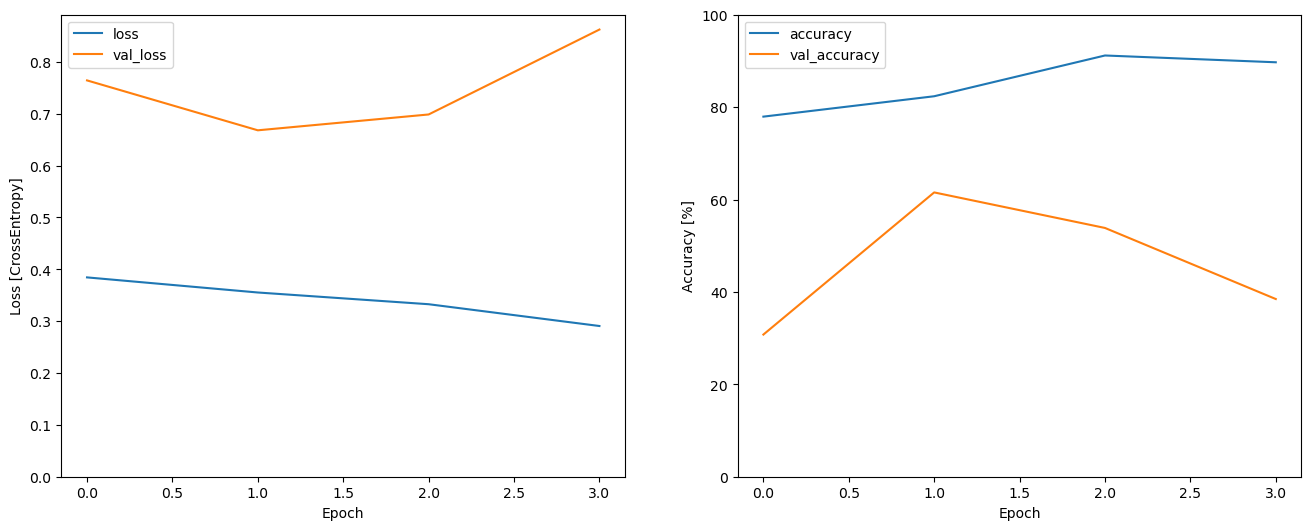

In [519]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [528]:
model.evaluate(test_spectrogram_ds, return_dict=True)

1/1 [==============================] - 0s 29ms/step - loss: 0.4991 - accuracy: 0.7500


{'loss': 0.4991099536418915, 'accuracy': 0.75}

In [529]:
y_pred = model.predict(test_spectrogram_ds)

1/1 [==============================] - 0s 27ms/step


In [530]:
y_pred = tf.argmax(y_pred, axis=1)

In [531]:
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

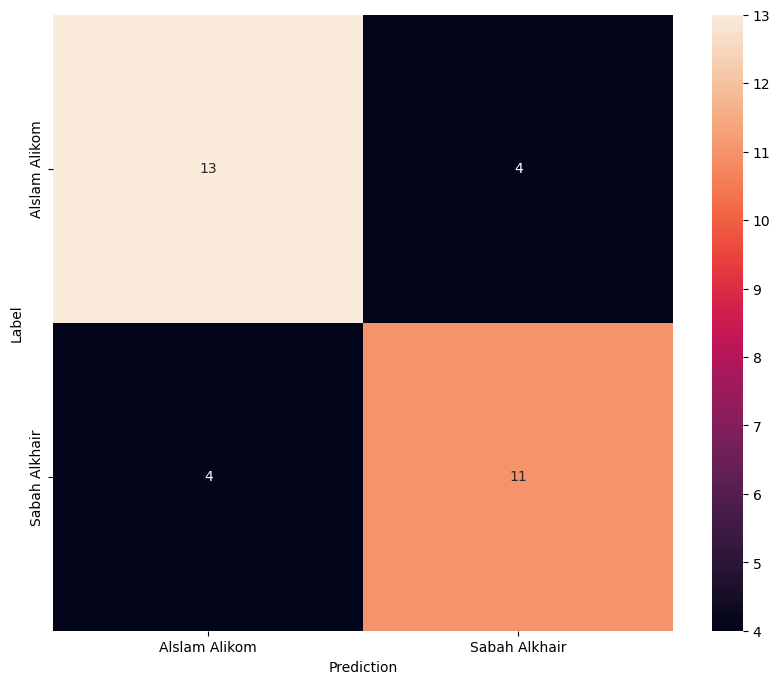

In [532]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

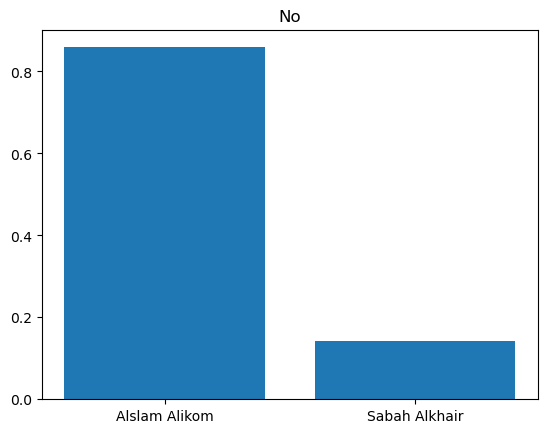

In [537]:
x = 'Alslam Alikom/2022_11_03_19_16_.wav'

x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=48000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]

prediction = model(x)
plt.bar(commands, tf.nn.softmax(prediction[0]))
plt.title('No')
plt.show()

display.display(display.Audio(waveform, rate=48000))

In [538]:
def test(name):
    x = name
    x = tf.io.read_file(str(x))
    x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=48000)
    x = tf.squeeze(x, axis=-1)
    waveform = x
    x = get_spectrogram(x)
    x = x[tf.newaxis,...]

    prediction = model(x)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title('Test')
    plt.show()

    display.display(display.Audio(waveform, rate=48000))

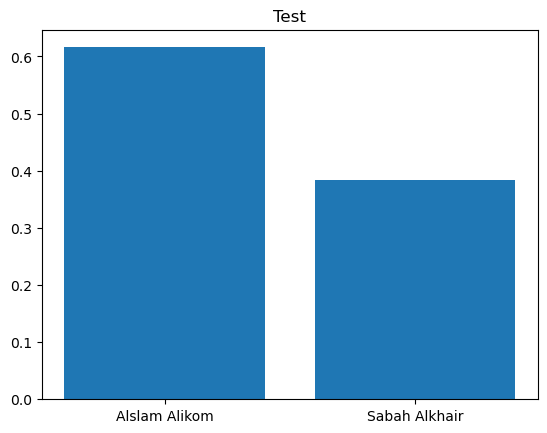

In [539]:
test('Test/Test.wav')

In [720]:
# # assign files
# input_file = "Test/2022_11_07_11_15_10.mp3"
# output_file = "Test2.wav"
  
# # convert mp3 file to wav file
# sound = AudioSegment.from_mp3(input_file)
# sound.export(output_file, format="wav")

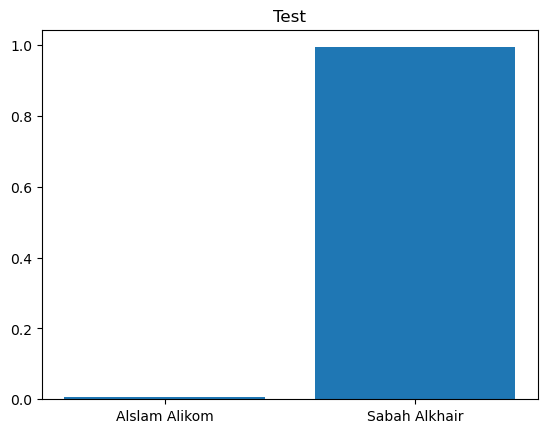

In [540]:
test('Test/Test2.wav')

## what we try to do:
**but faild 🥲**\
![loo](https://raw.githubusercontent.com/eyalbd2/Kaglle-Tensorflow-Speech-Recognition/master/Images/model_image.PNG)

***Example***:\
for recognition the `YES` command speech\
![like](https://raw.githubusercontent.com/eyalbd2/Kaglle-Tensorflow-Speech-Recognition/master/Images/model_image_2.PNG)